# EDA on Black friday dataset

### Data cleaning and preparing

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline


# Problem Statement

A retail company “ABC Private Limited” wants to understand the customer purchase behaviour (specifically, purchase amount) against various products of different categories. They have shared purchase summary of various customers for selected high volume products from last month. The data set also contains customer demographics (age, gender, marital status, city_type, stay_in_current_city), product details (product_id and product category) and Total purchase_amount from last month.

Now, they want to build a model to predict the purchase amount of customer against various products which will help them to create personalized offer for customers against different products.


In [52]:
df_train = pd.read_csv("blackfriday_train.csv")

In [53]:
df_train.sample(3)

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
436148,1001151,P00157642,M,26-35,15,C,2,1,1,14.0,16.0,15817
264305,1004678,P00336942,M,36-45,2,A,1,0,5,NaN,NaN,6975
442844,1002096,P00304442,F,26-35,17,C,1,1,1,16.0,NaN,18963


In [54]:
df_test=pd.read_csv("blackfriday_test.csv")

In [55]:
#appending data
df=df_train.append(df_test)

In [56]:
df.sample(3)

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
341510,1004517,P00005142,F,18-25,1,A,0,1,5,NaN,NaN,7040.0
161831,1003297,P00247542,M,18-25,4,A,3,0,8,16.0,NaN,NaN
503927,1005626,P00226842,M,55+,16,B,3,0,11,NaN,NaN,2947.0


In [57]:
df.shape

(783667, 12)

In [58]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 783667 entries, 0 to 233598
Data columns (total 12 columns):
 #   Column                      Non-Null Count   Dtype  
---  ------                      --------------   -----  
 0   User_ID                     783667 non-null  int64  
 1   Product_ID                  783667 non-null  object 
 2   Gender                      783667 non-null  object 
 3   Age                         783667 non-null  object 
 4   Occupation                  783667 non-null  int64  
 5   City_Category               783667 non-null  object 
 6   Stay_In_Current_City_Years  783667 non-null  object 
 7   Marital_Status              783667 non-null  int64  
 8   Product_Category_1          783667 non-null  int64  
 9   Product_Category_2          537685 non-null  float64
 10  Product_Category_3          237858 non-null  float64
 11  Purchase                    550068 non-null  float64
dtypes: float64(3), int64(4), object(5)
memory usage: 77.7+ MB


In [60]:
#Droping user_id
df.drop(['User_ID'],axis=1,inplace=True)

In [61]:
df.sample(2)

,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
72890,P00003642,M,36-45,17,B,2,0,8,NaN,NaN,NaN
423905,P00349442,M,36-45,12,A,3,0,6,8.0,NaN,12704.0


In [62]:
#maping Gender column
#handling categorical feature
df['Gender']= df['Gender'].map({'F':0,'M':1})

In [63]:
#or 
#df['Gender']=pd.get_dummies(df['Gender'],drop_first=1)

In [64]:
df.sample(4)

,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
83359,P0096842,1,51-55,11,B,1,1,3,4.0,12.0,NaN
203456,P00058242,1,26-35,0,C,2,1,3,4.0,12.0,NaN
224540,P00269642,0,0-17,10,C,2,0,11,16.0,NaN,1681.0
150289,P00101842,1,26-35,1,B,0,1,6,16.0,NaN,12228.0


In [68]:
#handling categorical feature age 
df['Age'].unique()

array(['0-17', '55+', '26-35', '46-50', '51-55', '36-45', '18-25'],
      dtype=object)

In [70]:
#pd.get_dummies(df['Age'],drop_first=True)
#not good practice
#Instead we'll do ordinal encoding

,18-25,26-35,36-45,46-50,51-55,55+
0,0,0,0,0,0,0
1,0,0,0,0,0,0
2,0,0,0,0,0,0
3,0,0,0,0,0,0
4,0,0,0,0,0,1
...,...,...,...,...,...,...
233594,0,1,0,0,0,0
233595,0,1,0,0,0,0
233596,0,1,0,0,0,0
233597,0,0,0,1,0,0


In [74]:
#Target ordinal encoding
df['Age']=df['Age'].map({'0-17':1,'18-25':2,'26-35':3,'36-45':4,'46-50':5,'51-55':6,'55+':7})
df['Age'].unique()

array([1, 7, 3, 5, 6, 4, 2], dtype=int64)

In [71]:
#Second Method
from sklearn.preprocessing import LabelEncoder
encoder=LabelEncoder()
df['Age']=encoder.fit_transform(df['Age'])
df['Age'].unique()

array([4, 2, 3, 1, 5, 6, 0])

##### Transforming City Column

In [77]:
df_city= pd.get_dummies(df['City_Category'],drop_first=True)

In [78]:
df_city.head(3)

,B,C
0,0,0
1,0,0
2,0,0


In [80]:
df=pd.concat([df,df_city],axis=1)
df.head()

,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase,B,C
0,P00069042,0,1,10,A,2,0,3,NaN,NaN,8370.0,0,0
1,P00248942,0,1,10,A,2,0,1,6.0,14.0,15200.0,0,0
2,P00087842,0,1,10,A,2,0,12,NaN,NaN,1422.0,0,0
3,P00085442,0,1,10,A,2,0,12,14.0,NaN,1057.0,0,0
4,P00285442,1,7,16,C,4+,0,8,NaN,NaN,7969.0,0,1


In [86]:
df.drop('City_Category',axis=1,inplace=True)

In [87]:
df.sample(4)

,Product_ID,Gender,Age,Occupation,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase,B,C
102487,P00245142,1,3,4,1,1,11,NaN,NaN,NaN,0,0
139629,P00266942,0,7,0,2,0,8,13.0,14.0,9847.0,0,1
351590,P00113842,1,3,1,2,1,6,8.0,16.0,20347.0,1,0
333067,P00129642,1,3,7,4+,0,5,NaN,NaN,5265.0,0,1


In [100]:
#Percentage of Missing values
df.isnull().mean()*100

Product_ID                     0.000000
Gender                         0.000000
Age                            0.000000
Occupation                     0.000000
Stay_In_Current_City_Years     0.000000
Marital_Status                 0.000000
Product_Category_1             0.000000
Product_Category_2            31.388587
Product_Category_3            69.648078
Purchase                      29.808452
B                              0.000000
C                              0.000000
dtype: float64

In [101]:
#Total Missing values
df.isnull().sum()

Product_ID                         0
Gender                             0
Age                                0
Occupation                         0
Stay_In_Current_City_Years         0
Marital_Status                     0
Product_Category_1                 0
Product_Category_2            245982
Product_Category_3            545809
Purchase                      233599
B                                  0
C                                  0
dtype: int64

In [103]:
df['Product_Category_2'].unique()

array([nan,  6., 14.,  2.,  8., 15., 16., 11.,  5.,  3.,  4., 12.,  9.,
       10., 17., 13.,  7., 18.])

In [104]:
df['Product_Category_3'].unique()

array([nan, 14., 17.,  5.,  4., 16., 15.,  8.,  9., 13.,  6., 12.,  3.,
       18., 11., 10.])

### Observation:
##### Data is discrete best way to impute nan values is by using mode

In [107]:
df['Product_Category_2'].value_counts()

8.0     91317
14.0    78834
2.0     70498
16.0    61687
15.0    54114
5.0     37165
4.0     36705
6.0     23575
11.0    20230
17.0    19104
13.0    15054
9.0      8177
12.0     7801
10.0     4420
3.0      4123
18.0     4027
7.0       854
Name: Product_Category_2, dtype: int64

In [121]:
##Replacing missing value with mode
df['Product_Category_2'].mode()
#getting series use mode()[0]

0    8.0
dtype: float64

In [122]:
df['Product_Category_2'].isnull()==True

0          True
1         False
2          True
3         False
4          True
          ...  
233594     True
233595    False
233596    False
233597    False
233598    False
Name: Product_Category_2, Length: 783667, dtype: bool

In [124]:
df['Product_Category_2']=df['Product_Category_2'].fillna(df['Product_Category_2'].mode()[0])

In [126]:
df['Product_Category_2'].isnull().sum()

0

In [133]:
### Product_Category_3

In [127]:
df['Product_Category_3'].mode()

0    16.0
dtype: float64

In [130]:
df['Product_Category_3']=df['Product_Category_3'].fillna(df['Product_Category_3'].mode()[0])

In [131]:
df.isnull().sum()

Product_ID                         0
Gender                             0
Age                                0
Occupation                         0
Stay_In_Current_City_Years         0
Marital_Status                     0
Product_Category_1                 0
Product_Category_2                 0
Product_Category_3                 0
Purchase                      233599
B                                  0
C                                  0
dtype: int64

In [134]:
df.sample(4)

,Product_ID,Gender,Age,Occupation,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase,B,C
80836,P00112142,1,2,4,2,0,1,2.0,14.0,15783.0,1,0
100187,P00202142,1,3,0,3,0,8,16.0,17.0,9937.0,1,0
410402,P00080342,0,4,0,0,0,1,6.0,8.0,15501.0,0,0
180986,P00159842,0,1,10,2,0,1,16.0,16.0,NaN,1,0


In [135]:
##Encoding Stay_In_Current_City_Years

In [137]:
df['Stay_In_Current_City_Years'].unique()

array(['2', '4+', '3', '1', '0'], dtype=object)

In [138]:
df['Stay_In_Current_City_Years'].str.replace('+','')

C:\Users\HP\AppData\Local\Temp/ipykernel_13912/3097934778.py:1: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  df['Stay_In_Current_City_Years'].str.replace('+','')


0         2
1         2
2         2
3         2
4         4
         ..
233594    4
233595    4
233596    4
233597    4
233598    4
Name: Stay_In_Current_City_Years, Length: 783667, dtype: object

In [139]:
df['Stay_In_Current_City_Years']=df['Stay_In_Current_City_Years'].str.replace('+','')

C:\Users\HP\AppData\Local\Temp/ipykernel_13912/2063355665.py:1: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  df['Stay_In_Current_City_Years']=df['Stay_In_Current_City_Years'].str.replace('+','')


In [140]:
df.head(3)

,Product_ID,Gender,Age,Occupation,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase,B,C
0,P00069042,0,1,10,2,0,3,8.0,16.0,8370.0,0,0
1,P00248942,0,1,10,2,0,1,6.0,14.0,15200.0,0,0
2,P00087842,0,1,10,2,0,12,8.0,16.0,1422.0,0,0


In [182]:
df.columns

Index(['Product_ID', 'Gender', 'Age', 'Occupation',
       'Stay_In_Current_City_Years', 'Marital_Status', 'Product_Category_1',
       'Product_Category_2', 'Product_Category_3', 'Purchase', 'B', 'C'],
      dtype='object')

In [184]:
df=df[['Product_ID', 'Gender', 'Age', 'Occupation',
       'Stay_In_Current_City_Years', 'Marital_Status', 'Product_Category_1',
       'Product_Category_2', 'Product_Category_3', 'B', 'C','Purchase']]

In [141]:
df['Stay_In_Current_City_Years'].unique()

array(['2', '4', '3', '1', '0'], dtype=object)

In [142]:
df.dtypes

Product_ID                     object
Gender                          int64
Age                             int64
Occupation                      int64
Stay_In_Current_City_Years     object
Marital_Status                  int64
Product_Category_1              int64
Product_Category_2            float64
Product_Category_3            float64
Purchase                      float64
B                               uint8
C                               uint8
dtype: object

In [146]:
#convert object into integes
df['Stay_In_Current_City_Years']=df['Stay_In_Current_City_Years'].astype('int64')

In [147]:
df.dtypes

Product_ID                     object
Gender                          int64
Age                             int64
Occupation                      int64
Stay_In_Current_City_Years      int64
Marital_Status                  int64
Product_Category_1              int64
Product_Category_2            float64
Product_Category_3            float64
Purchase                      float64
B                               uint8
C                               uint8
dtype: object

In [148]:
df['B']=df['B'].astype('int64')
df['C']=df['C'].astype('int64')

In [149]:
df.dtypes

Product_ID                     object
Gender                          int64
Age                             int64
Occupation                      int64
Stay_In_Current_City_Years      int64
Marital_Status                  int64
Product_Category_1              int64
Product_Category_2            float64
Product_Category_3            float64
Purchase                      float64
B                               int64
C                               int64
dtype: object

### Visualization Age vs Product Category w.r.t Marital Status

C:\Users\HP\AppData\Local\Programs\Python\Python39\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


[]

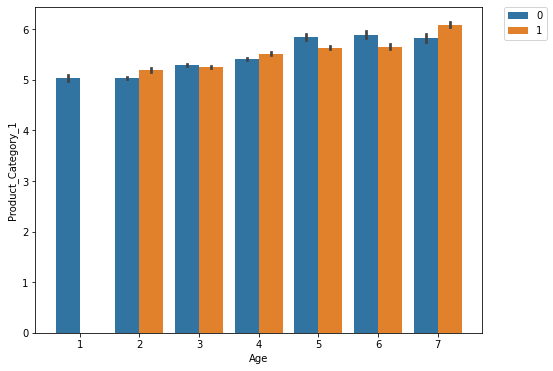

In [217]:
sns.barplot('Age','Product_Category_1',hue='Marital_Status',data=df)
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
plt.rcParams['figure.figsize']=8,6
plt.plot()

##### Product Category 1 bought mostly by married 

C:\Users\HP\AppData\Local\Programs\Python\Python39\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


[]

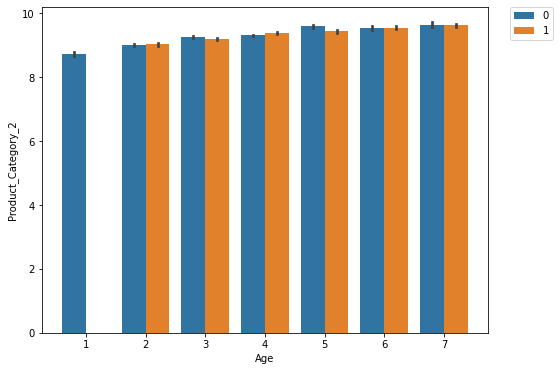

In [218]:
sns.barplot('Age','Product_Category_2',hue='Marital_Status',data=df)
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
plt.rcParams['figure.figsize']=8,6
plt.plot()

##### Product Category 2 bought equally by married and un married

C:\Users\HP\AppData\Local\Programs\Python\Python39\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


[]

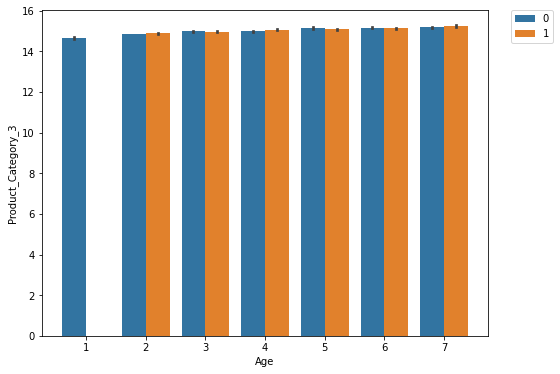

In [219]:
sns.barplot('Age','Product_Category_3',hue='Marital_Status',data=df)
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
plt.rcParams['figure.figsize']=8,6
plt.plot()

##### Product Category 3 also bought equally by married and un married

### Visualisation Age vs Purchase history w.r.t Gender


C:\Users\HP\AppData\Local\Programs\Python\Python39\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


[]

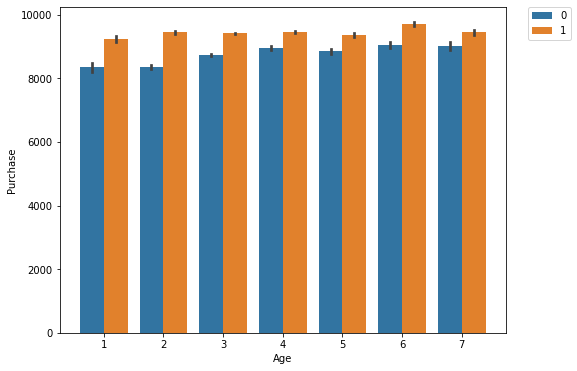

In [157]:
#Visualisation Age vs Purchase
sns.barplot('Age','Purchase',hue='Gender',data=df)
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
plt.rcParams['figure.figsize']=8,6
plt.plot()

### Observation from data
##### 1) Pruchasing of men is high than women

C:\Users\HP\AppData\Local\Programs\Python\Python39\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


[]

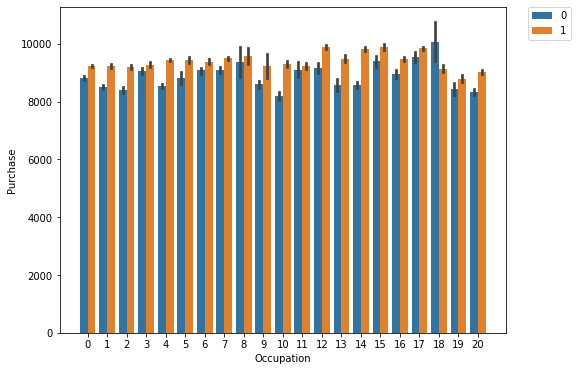

In [159]:
#visualization of Occupation vs Purchase
sns.barplot('Occupation','Purchase',hue='Gender',data=df)
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
plt.rcParams['figure.figsize']=8,6
plt.plot()

### Observation 
##### 1) Purchase history is uniform irrespective of Occupation

C:\Users\HP\AppData\Local\Programs\Python\Python39\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


[]

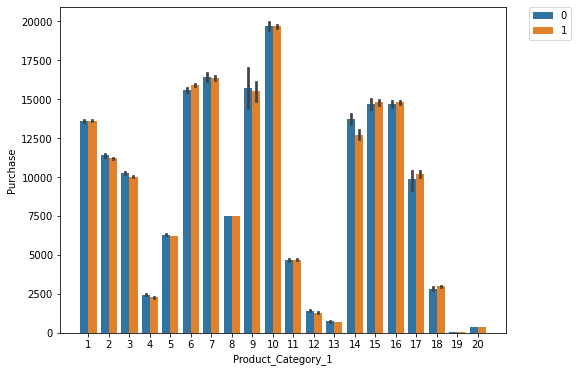

In [163]:
#visualization of Product Category 1 vs Purchase
sns.barplot('Product_Category_1','Purchase',hue='Gender',data=df)
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
plt.rcParams['figure.figsize']=8,6
plt.plot()

C:\Users\HP\AppData\Local\Programs\Python\Python39\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


[]

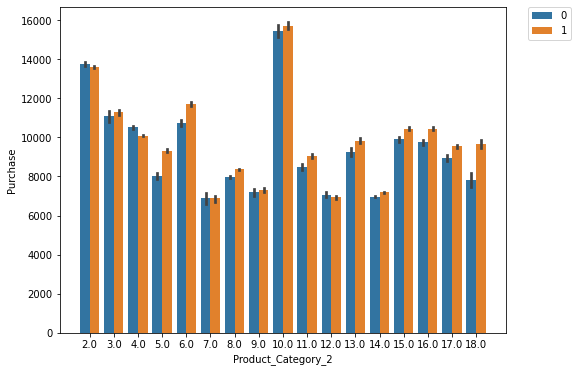

In [164]:
#visualization of Product Category 2 vs Purchase
sns.barplot('Product_Category_2','Purchase',hue='Gender',data=df)
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
plt.rcParams['figure.figsize']=8,6
plt.plot()

C:\Users\HP\AppData\Local\Programs\Python\Python39\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


[]

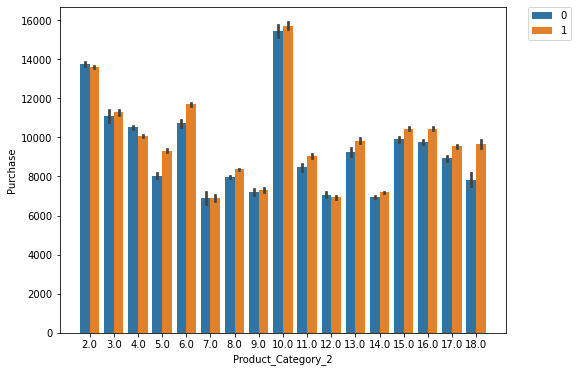

In [165]:
#visualization of Product Category 3 vs Purchase
sns.barplot('Product_Category_2','Purchase',hue='Gender',data=df)
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
plt.rcParams['figure.figsize']=8,6
plt.plot()

### Observation 
##### 1) Product Category is bought the most 

In [177]:
#drop product id if you want

In [196]:
df.drop(['Product_ID'],axis=1,inplace=True)

C:\Users\HP\AppData\Local\Programs\Python\Python39\lib\site-packages\pandas\core\frame.py:4901: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


In [197]:
df.head()

,Gender,Age,Occupation,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,B,C,Purchase
0,0,1,10,2,0,3,8.0,16.0,0,0,8370.0
1,0,1,10,2,0,1,6.0,14.0,0,0,15200.0
2,0,1,10,2,0,12,8.0,16.0,0,0,1422.0
3,0,1,10,2,0,12,14.0,16.0,0,0,1057.0
4,1,7,16,4,0,8,8.0,16.0,0,1,7969.0


In [198]:
df.dtypes

Gender                          int64
Age                             int64
Occupation                      int64
Stay_In_Current_City_Years      int64
Marital_Status                  int64
Product_Category_1              int64
Product_Category_2            float64
Product_Category_3            float64
B                               int64
C                               int64
Purchase                      float64
dtype: object

In [199]:
#Storing all records into test data where purchase is null for cross validation
df_test=df[df['Purchase'].isnull()]

In [200]:
#df[df['Purchase'].isnull()==False]
#or
df_train=df[~df['Purchase'].isnull()]

In [201]:
from sklearn.model_selection import train_test_split

In [202]:
X_train,X_test,y_train,y_test=train_test_split(df_train.iloc[:,:-1],df_train.iloc[:,-1:],random_state=0)

#### Feature Scaling

In [203]:
from sklearn.preprocessing import StandardScaler

In [204]:
std_sc= StandardScaler()

In [207]:
X_train=std_sc.fit_transform(X_train)

In [209]:
X_test=std_sc.transform(X_test)

##### Data is Cleaned and is ready to feed the model